In [ ]:
#Data -->text,video,image,audio
#Data is dirty we need to clean before actually get insights,incommplete,noisy,inconsistent,duplicate
#Quality data-->acuracy,completeness,consistency,believeability,interpretability
#steps in Data preprocessing
#data cleaning ,data integration,data reduction,data transformation-->data normalization,data discretization
#feature engineering is process to create feature/extract the feature from existing feature by domain knowledge to increase the 
#performance of machine learning model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
d=pd.read_csv("C:\\Users\\usman\\Documents\\train.csv")

In [ ]:
d

In [ ]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [ ]:
d.head(10)

In [ ]:
d.info()

In [ ]:
d.isnull().sum()

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(d.isnull())
#"Daag and dhabbay represents the missing values in data we to clean it "

In [ ]:
#To check percentage of missing data in each columns
#we use dataframe.shape[0] to count total number of rows in our data set
per_missing_data=d.isnull().sum()/d.shape[0]*100
per_missing_data

In [ ]:
#fetch all the colmuns in which at least 17% missing data present
drop_column=per_missing_data[per_missing_data>15].keys()
drop_column

In [ ]:
df=d.drop(columns=drop_column)

In [ ]:
plt.figure(figsize=(18,9))

sns.heatmap(df.isnull())

In [ ]:
#lets drop those rows in which at least one nan value is present
df1=df.dropna()

In [ ]:
df1.shape

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(df1.isnull())

In [ ]:
#now we think that are we done correctly with data cleaning? to check that we must do data distribution
#view each data attribute before cleasing and after cleasning graphically
#distribution for numeric data

In [ ]:
num_var=df1.select_dtypes(include=["int64","float64"]).columns
num_var


In [ ]:

sns.distplot(d["MSSubClass"])
sns.distplot(df1["MSSubClass"])

plt.show()

In [ ]:
#plt.figure(figsize=(18,9))
#for i,var in enumerate(num_var):
    #plt.subplot(10,4,i+1)
    #sns.distplot(df1[var],bins=20)

In [ ]:
#distribution for categorigal data
#lets do

catego_var=df1.select_dtypes(include=["object"]).columns
catego_var

In [ ]:
df1["MSZoning"].value_counts()/df1.shape[0]*100

In [ ]:
df1["MSZoning"].value_counts()/df1.shape[0]*100,d["MSZoning"].value_counts()/d.shape[0]*100

In [ ]:
pd.concat([df1["MSZoning"].value_counts()/df1.shape[0]*100,d["MSZoning"].value_counts()/d.shape[0]*100],axis=1,
keys=["MSZoning_New","MSZoning_Org"])

In [ ]:
#create function for 38 attributes
def categorical(var):
   return pd.concat([df1[var].value_counts()/df1.shape[0]*100,d[var].value_counts()/d.shape[0]*100],axis=1,
keys=[var+"_New",var+"_Org"])

In [ ]:
categorical("MSZoning")

In [ ]:
catego_var

    

In [ ]:
for i in catego_var:
     print(categorical(i))

In [ ]:
#Mean,median,mode
#we use maximally mean and median when we have numaric data
#we use mode when we have categorical data 


In [2]:
d=pd.read_csv("C:\\Users\\usman\\Documents\\train.csv")

In [3]:
d.shape

(1460, 81)

In [4]:
d.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
d.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
d.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
missing_per=d.isnull().sum()/d.shape[0]*100

In [9]:
missing_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [18]:
drop_data=missing_per[missing_per>15].keys()
drop_data


Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [20]:
data=d.drop(columns=drop_data)

In [21]:
data.shape

(1460, 75)

In [22]:
data.isnull().sum().sum()

609

<AxesSubplot:>

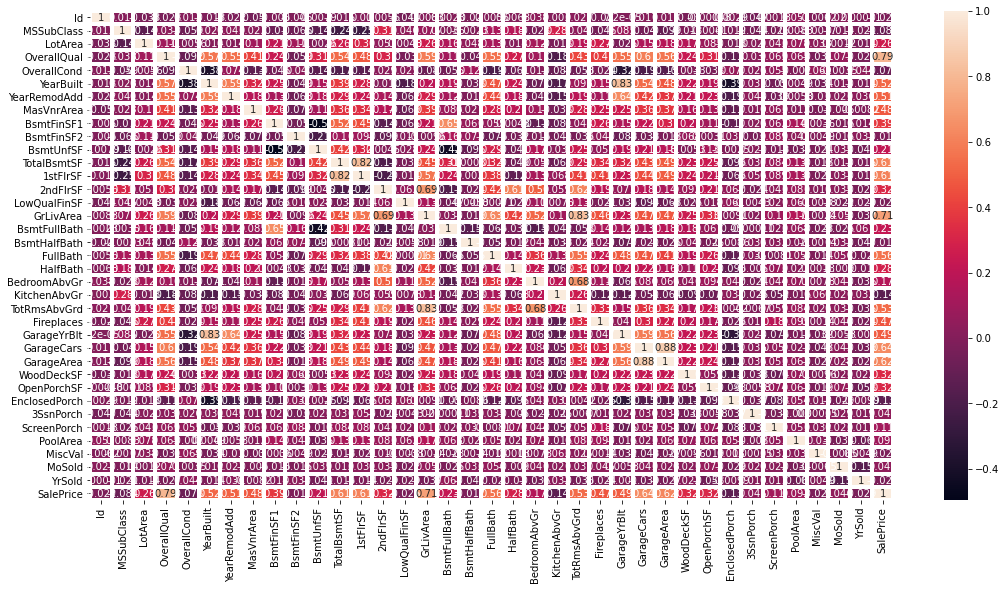

In [23]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),linewidth=3,annot=True)

In [24]:
data.isnull().sum().sum()

609

<AxesSubplot:>

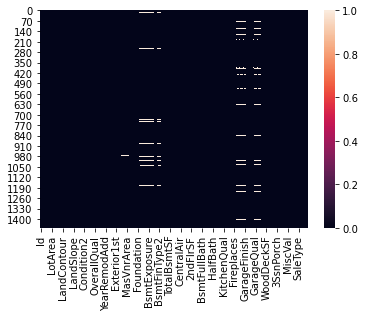

In [25]:
sns.heatmap(data.isnull())

In [ ]:
#fetch all the rows in which missing data is present

In [ ]:
#pd.set_option("display.max_rows",None)
#pd.set_option("display.max_columns",None)
#data[data.isnull().any(axis=1)]

In [ ]:
#data.isnull().sum()

In [26]:
#
cat_col=data.select_dtypes(include=["object"]).columns

In [27]:
#to access colmns in which missing data present
missing_data_col=[var for var in data.columns if data[var].isnull().sum()>0]
missing_data_col

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [44]:
#to check which value i have to filled in empty rows first i have to see data distribution
#for this i have to use distplot

my_col=['MasVnrArea', 'GarageYrBlt']

C:\Users\usman\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usman\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


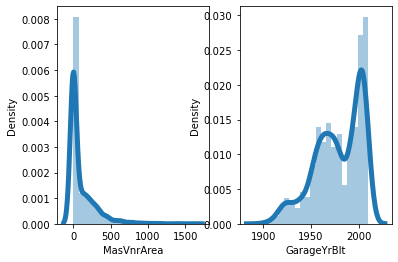

In [46]:
for i,var in enumerate(my_col):
    plt.subplot(1,2,i+1)
    sns.distplot(data[var],bins=20,kde_kws={"linewidth":5})

# to check Data Distrubtion visually first we have to seprate numeric colmuns and categorical columns then take a look to their analysis and then decide which data we should fill in place of nan value then merge both categrical and numeric data set

In [55]:
#when data is normally distributed then we can fill it with mean,median mode bcz they remain same at this stage
#if data is skewed then use median to fill missing data
#when data is skewed we can also use mode most frequent value to replace missing data
df=data.fillna(data.mean())


C:\Users\usman\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usman\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usman\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

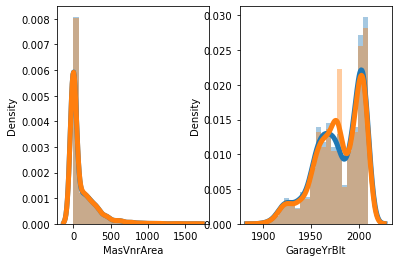

In [56]:
#to check data distribution before filling nan value and after filling nan value
for i,var in enumerate(my_col):
    plt.subplot(1,2,i+1)
    sns.distplot(data[var],bins=20,kde_kws={"linewidth":5})
    sns.distplot(df[var],bins=20,kde_kws={"linewidth":5})